# Keras vs Scikit-learn

## Regression

### Using LinearRegression + Polynomial Features in Scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [73]:
X = 4 * np.random.rand(100, 1) - 2
y = 0.5*X**3 + X**2 + 2*X + 1 + 3*np.random.randn(100, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [75]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_train_poly, y_train)

LinearRegression()

In [76]:
preds_sklearn = model_sklearn.predict(X_test_poly)
mse_sklearn = mean_squared_error(y_test, preds_sklearn)
r2_sklearn = r2_score(y_test, preds_sklearn)

In [77]:
print(f"MSE sklearn: {mse_sklearn}")
print(f"R2 sklearn: {r2_sklearn}")

MSE sklearn: 9.51703705368282
R2 sklearn: 0.6567512850546628


### Using MLP in Keras

In [26]:
from keras import Sequential
from keras.layers import Dense, Dropout

model_keras = Sequential([
    Dense(32, activation="tanh", input_shape=(1,)),
    Dropout(0.3),
    Dense(16, activation="tanh"),
    Dropout(0.2),
    Dense(1)
])

model_keras.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model_keras.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [88]:
history = model_keras.fit(X_train, y_train, epochs=150, verbose=0)

In [89]:
preds_keras = model_keras.predict(X_test)
mse_keras = mean_squared_error(y_test, preds_keras)
r2_keras = r2_score(y_test, preds_keras)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [90]:
print(f"MSE keras: {mse_keras}")
print(f"R2 keras: {r2_keras}")

MSE keras: 10.472472465574162
R2 keras: 0.6222918229873102


### Visualization

In [91]:
x = np.linspace(-3, 3, 100)
x_poly = poly.fit_transform(x.reshape(-1, 1))
y_pred_sklearn = model_sklearn.predict(x_poly)
y_pred_keras = model_keras.predict(x.reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


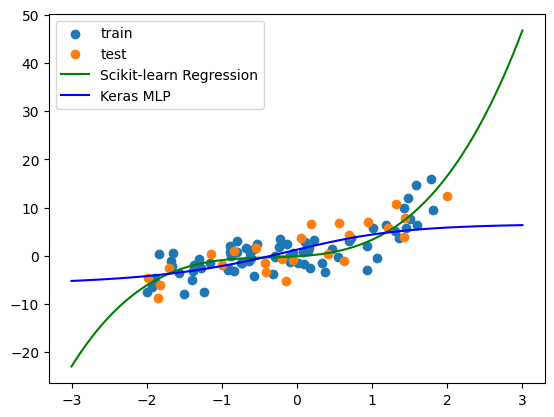

In [92]:
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.plot(x, y_pred_sklearn, "g", label="Scikit-learn Regression")
plt.plot(x, y_pred_keras, "b", label="Keras MLP")
plt.legend()
plt.show()

## Classification

In [3]:
from keras import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# Flattening and Normalization
X_train = (X_train.reshape(-1, 28*28) / 255).astype(np.float32)
X_test = (X_test.reshape(-1, 28*28) / 255).astype(np.float32)

### Using Scikit-learn LogisticRegression

In [102]:
model_sklearn_2 = LogisticRegression(max_iter=1000)
model_sklearn_2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [103]:
preds_sklearn_2 = model_sklearn_2.predict(X_test)
report_sklearn_2 = classification_report(y_test, preds_sklearn_2)

print("Scikit-learn Logistic Regression Classification Report:")
print(report_sklearn_2)

Scikit-learn Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       980
           1       0.60      0.99      0.75      1135
           2       0.89      0.70      0.78      1032
           3       0.66      0.86      0.75      1010
           4       0.83      0.83      0.83       982
           5       0.96      0.28      0.44       892
           6       0.85      0.88      0.86       958
           7       0.77      0.87      0.82      1028
           8       0.88      0.63      0.74       974
           9       0.86      0.69      0.76      1009

    accuracy                           0.78     10000
   macro avg       0.81      0.77      0.76     10000
weighted avg       0.81      0.78      0.77     10000



### Using MLP in Keras

In [32]:
model_keras_2 = Sequential([
    Dense(32, activation="relu", input_shape=(28*28,)),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

model_keras_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from keras.optimizers import Adam

In [30]:
model_keras_2.compile(optimizer=Adam(learning_rate=0.01),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

In [31]:
history = model_keras_2.fit(X_train, y_train, epochs=20,
                            validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6693 - loss: 0.9906 - val_accuracy: 0.9020 - val_loss: 0.3561
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8066 - loss: 0.6355 - val_accuracy: 0.9209 - val_loss: 0.2921
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8190 - loss: 0.5884 - val_accuracy: 0.9227 - val_loss: 0.2948
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8235 - loss: 0.5827 - val_accuracy: 0.9232 - val_loss: 0.2972
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8250 - loss: 0.5770 - val_accuracy: 0.9298 - val_loss: 0.2765
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8292 - loss: 0.5664 - val_accuracy: 0.9132 - val_loss: 0.3064
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8327 - loss: 0.5577 - val_accuracy: 0.9254 - val_loss: 0.2794
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8415 - loss: 0.5242 

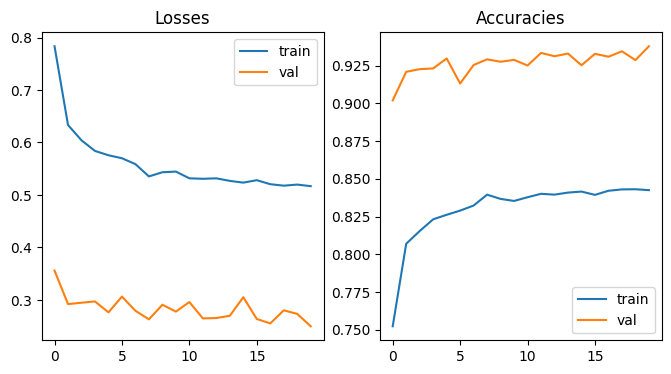

In [33]:
train_losses = history.history["loss"]
val_losses = history.history["val_loss"]
train_accs = history.history["accuracy"]
val_accs = history.history["val_accuracy"]

# plot losses and accuracies in a side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].plot(train_losses, label="train")
axs[0].plot(val_losses, label="val")
axs[0].set_title("Losses")
axs[0].legend()
axs[1].plot(train_accs, label="train")
axs[1].plot(val_accs, label="val")
axs[1].set_title("Accuracies")
axs[1].legend()
plt.show()

In [34]:
y_probs_keras_2 = model_keras_2.predict(X_test)
y_preds_keras_2 = np.argmax(y_probs_keras_2, axis=1)
report_keras_2 = classification_report(y_test, y_preds_keras_2)

print("Keras MLP Classification Report:")
print(report_keras_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Keras MLP Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.35      0.09      0.14      1010
           4       0.03      0.02      0.03       982
           5       0.07      0.10      0.08       892
           6       0.00      0.00      0.00       958
           7       0.42      0.02      0.04      1028
           8       0.30      0.03      0.06       974
           9       0.11      0.72      0.19      1009

    accuracy                           0.10     10000
   macro avg       0.13      0.10      0.06     10000
weighted avg       0.13      0.10      0.06     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
y_probs_keras_2 = model_keras_2.predict(X_train)
y_preds_keras_2 = np.argmax(y_probs_keras_2, axis=1)
report_keras_2 = classification_report(y_train, y_preds_keras_2)

print("Keras MLP Classification Report:")
print(report_keras_2)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Keras MLP Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.01      0.01      5923
           1       0.00      0.00      0.00      6742
           2       0.00      0.00      0.00      5958
           3       0.38      0.09      0.15      6131
           4       0.03      0.02      0.03      5842
           5       0.07      0.10      0.08      5421
           6       0.00      0.00      0.00      5918
           7       0.48      0.02      0.05      6265
           8       0.22      0.03      0.05      5851
           9       0.11      0.73      0.19      5949

    accuracy                           0.10     60000
   macro avg       0.13      0.10      0.06     60000
weighted avg       0.13      0.10      0.05     60000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
